In [30]:
from rr_project_bulatova_popp import PairedTtest, IndependentTtest, MultiGroupTest

import scipy.stats as st
from scipy.stats import shapiro, normaltest, ttest_rel, wilcoxon, ttest_ind, mannwhitneyu, f_oneway, kruskal, bartlett, alexandergovern
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from joypy import joyplot
from scipy.stats import norm
from typing import Callable

In [3]:
df = pd.read_csv('D:\\LPNU\\5 семестр (3)\\СМП\\Датасети\\math_grades_wrt_alcohol_consumption.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   sem1_alc1  28 non-null     int64
 1   sem2_alc1  28 non-null     int64
 2   sem3_alc1  28 non-null     int64
 3   sem1_alc2  28 non-null     int64
 4   sem2_alc2  28 non-null     int64
 5   sem3_alc2  28 non-null     int64
 6   sem1_alc3  28 non-null     int64
 7   sem2_alc3  28 non-null     int64
 8   sem3_alc3  28 non-null     int64
 9   sem1_alc4  28 non-null     int64
 10  sem2_alc4  28 non-null     int64
 11  sem3_alc4  28 non-null     int64
 12  sem1_alc5  28 non-null     int64
 13  sem2_alc5  28 non-null     int64
 14  sem3_alc5  28 non-null     int64
dtypes: int64(15)
memory usage: 3.4 KB


### paired non-parametric test

In [4]:
paired_err1 = PairedTtest(df, ['sem1_alc1', 'sem2_alc1', 'sem3_alc1'])

ValueError: The number of samples must be 2.

In [5]:
paired_err_2 = PairedTtest(df, ['sem1_alc1', 'sem2_alc1'], 1.1)

ValueError: The 'alpha' must be a float between 0 and 1.

In [31]:
paired1 = PairedTtest(df, ['sem1_alc1', 'sem2_alc1'])
paired1.check_normality()

---The Shapiro-Wilk normality test has been performed---

               Diff
stat       0.888831
p_value    0.006326
is_normal     False
pvalue =< alpha: reject H0, so it will be a non-parametric version of T-test


np.False_

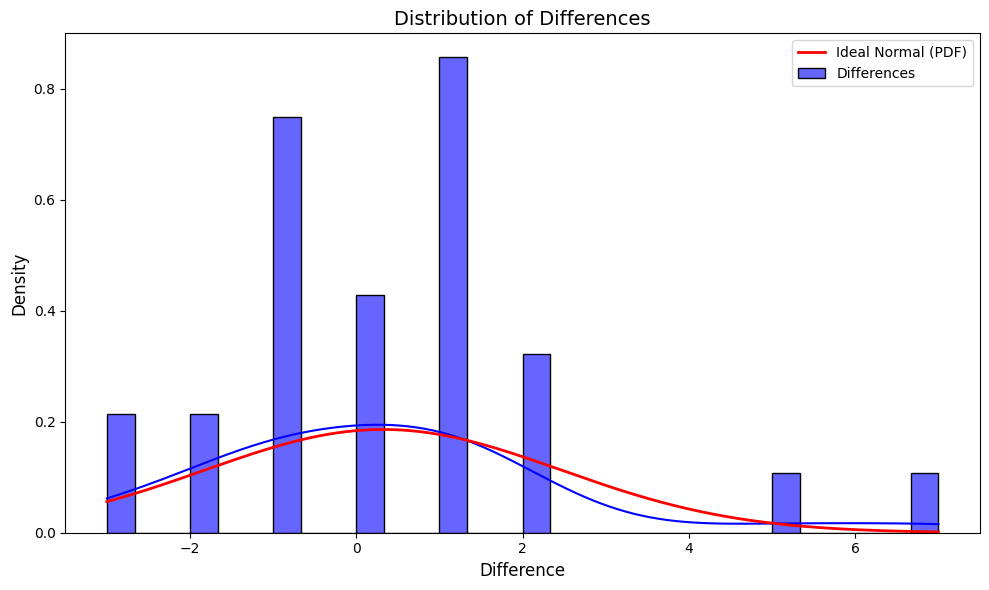

In [7]:
paired1.normality_visualization()

---The Shapiro-Wilk normality test has been performed---

               Diff
stat       0.888831
p_value    0.006326
is_normal     False
pvalue =< alpha: reject H0, so it will be a non-parametric version of T-test
Wilcoxon test:
pvalue 0.6585834072057888 > alpha: failed to reject H0 (median values can be equal)


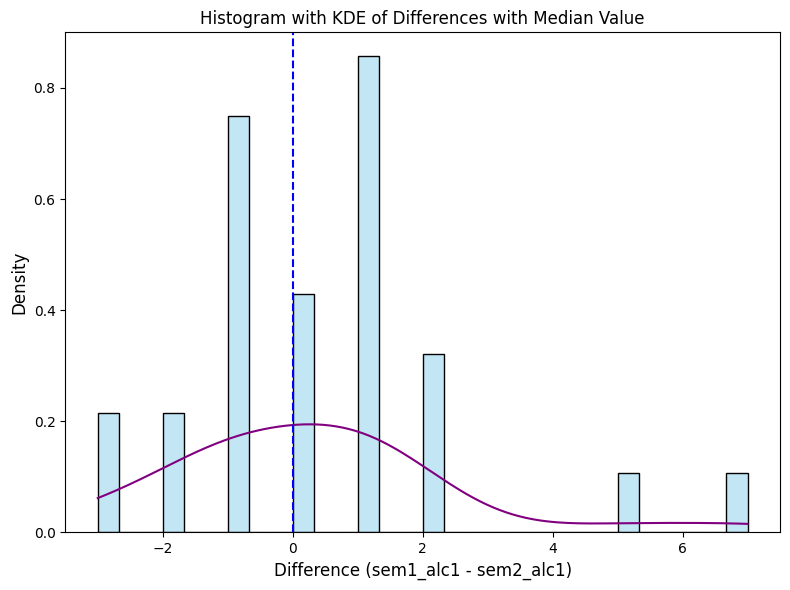

{'pvalue': np.float64(0.6585834072057888), 'statistic': np.float64(135.0)}

In [9]:
paired1.run_test()

### paired parametric test

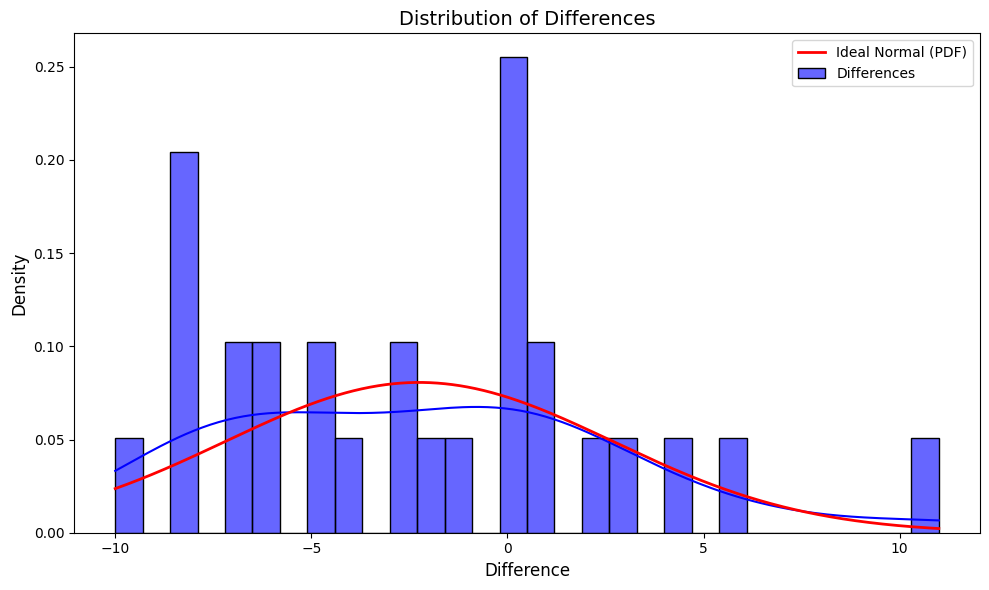

In [10]:
paired2 = PairedTtest(df, ['sem1_alc1', 'sem1_alc2'])
paired2.normality_visualization()

---The Shapiro-Wilk normality test has been performed---

               Diff
stat       0.951653
p_value    0.217953
is_normal      True
pvalue > alpha: failed to reject H0, so it will be a parametric version of T-test
t-test:
pvalue 0.02325457558438358 =< alpha: reject H0 (mean values are not equal)


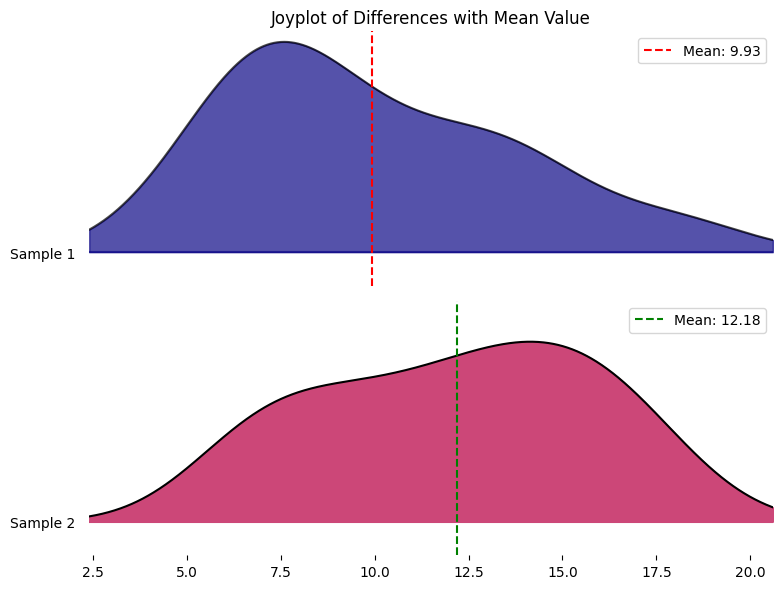

{'pvalue': np.float64(0.02325457558438358),
 'statistic': np.float64(-2.405805832007906)}

In [11]:
paired2.run_test()

### unpaired parametric test

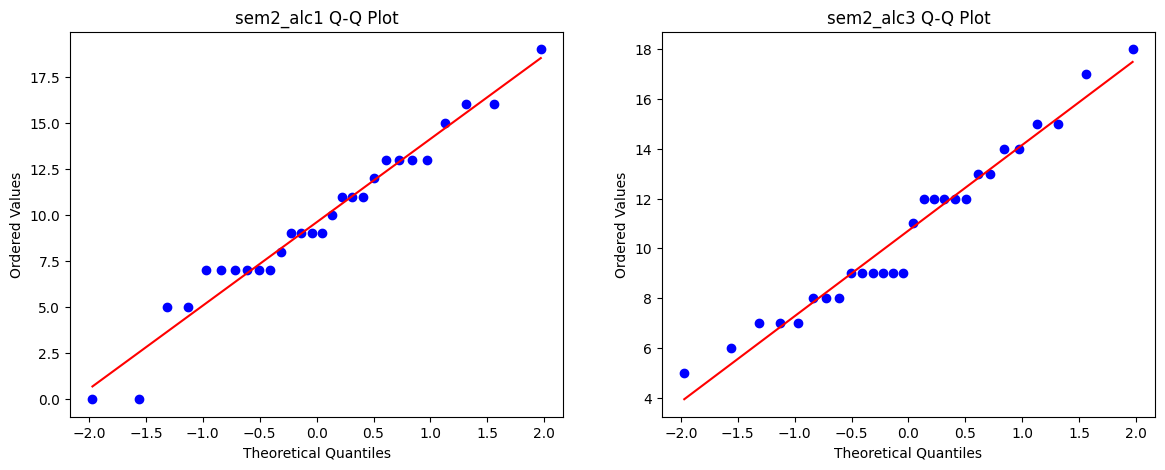

In [12]:
unpaired1 = IndependentTtest(df, ['sem2_alc1', 'sem2_alc3'])
unpaired1.normality_visualization("probplot")

---The Shapiro-Wilk normality test has been performed---

          sem2_alc1 sem2_alc3
stat       0.967211  0.958085
p_value    0.508127   0.31377
is_normal      True      True
All THE SAMPLES ARE NORMALLY DISTRIBUTED

Independent t-test:
pvalue 0.29697710779174447 > alpha: failed to reject H0 (mean values can be equal)


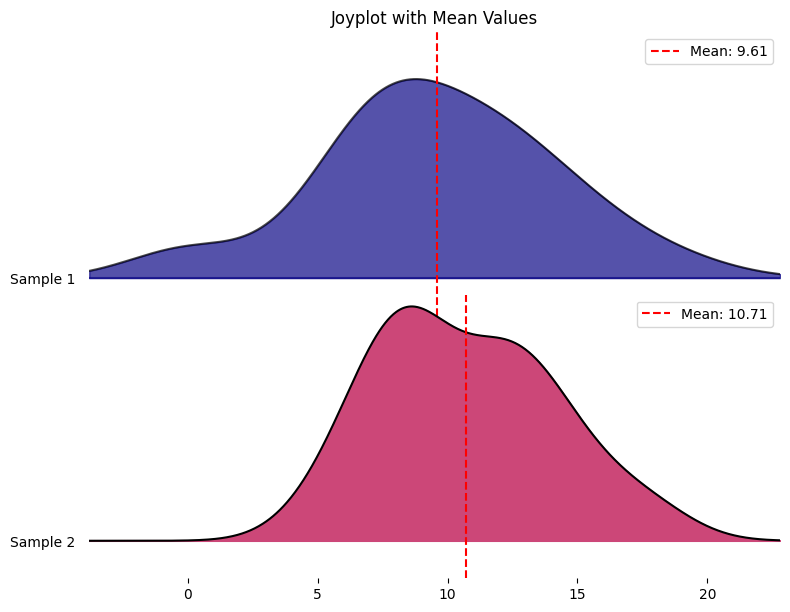

{'pvalue': np.float64(0.29697710779174447),
 'statistic': np.float64(-1.05385114428087)}

In [13]:
unpaired1.run_test()

### unpaired non-parametric test

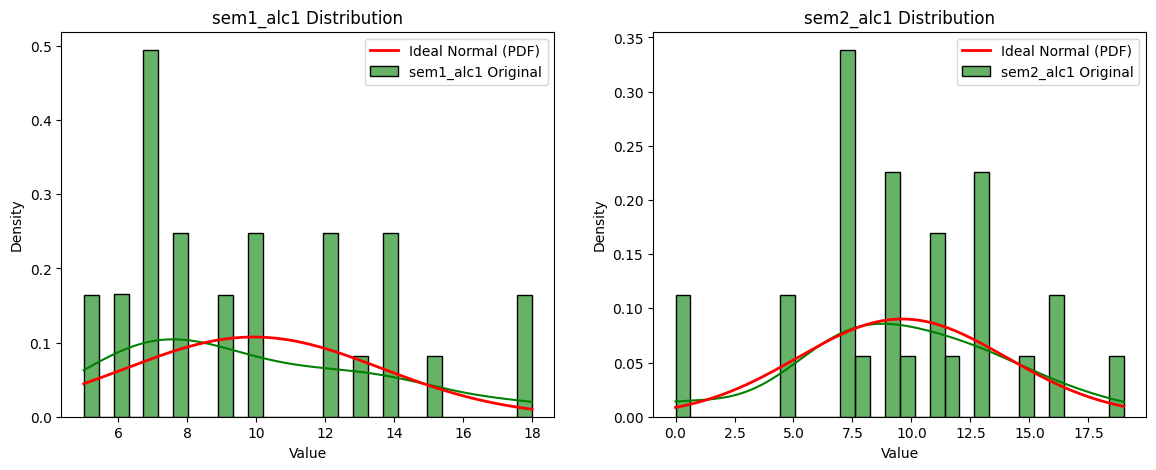

In [14]:
unpaired2 = IndependentTtest(df, ['sem1_alc1', 'sem2_alc1'])
unpaired2.normality_visualization()

---The Shapiro-Wilk normality test has been performed---

          sem1_alc1 sem2_alc1
stat       0.918413  0.967211
p_value    0.031695  0.508127
is_normal     False      True
Any of the samples is not normally distributed

Mannwhitneyu test:
pvalue 0.9934182078791225 > alpha: failed to reject H0 (distributions of samples are not significantly different)


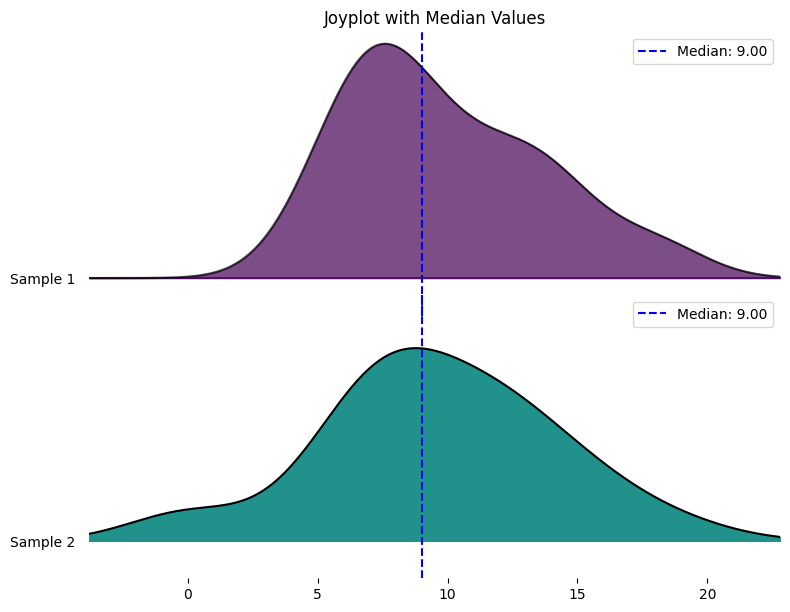

{'pvalue': np.float64(0.9934182078791225), 'statistic': np.float64(391.0)}

In [15]:
unpaired2.run_test()

### ANOVA parametric test

In [16]:
multi_group1 = MultiGroupTest(df, ['sem2_alc3', 'sem2_alc2', 'sem2_alc5'])

In [17]:
multi_group1.descriptive_stats()

,sem2_alc3,sem2_alc2,sem2_alc5
mean,10.714286,11.5,10.357143
std,3.36493,3.437269,3.176468
var,11.322751,11.814815,10.089947
min,5,6,5
max,18,18,18
range,13,12,13
mode,"(9, 6)","(15, 5)","(8, 6)"
median,10.0,11.5,9.0
kurtosis,-0.692986,-1.028311,-0.420063
skewness,0.359042,-0.02229,0.521127


In [18]:
multi_group1.check_normality()

---The Shapiro-Wilk normality test has been performed---

          sem2_alc3 sem2_alc2 sem2_alc5
stat       0.958085  0.954866  0.940237
p_value     0.31377  0.261891  0.112078
is_normal      True      True      True
All THE SAMPLES ARE NORMALLY DISTRIBUTED



np.True_

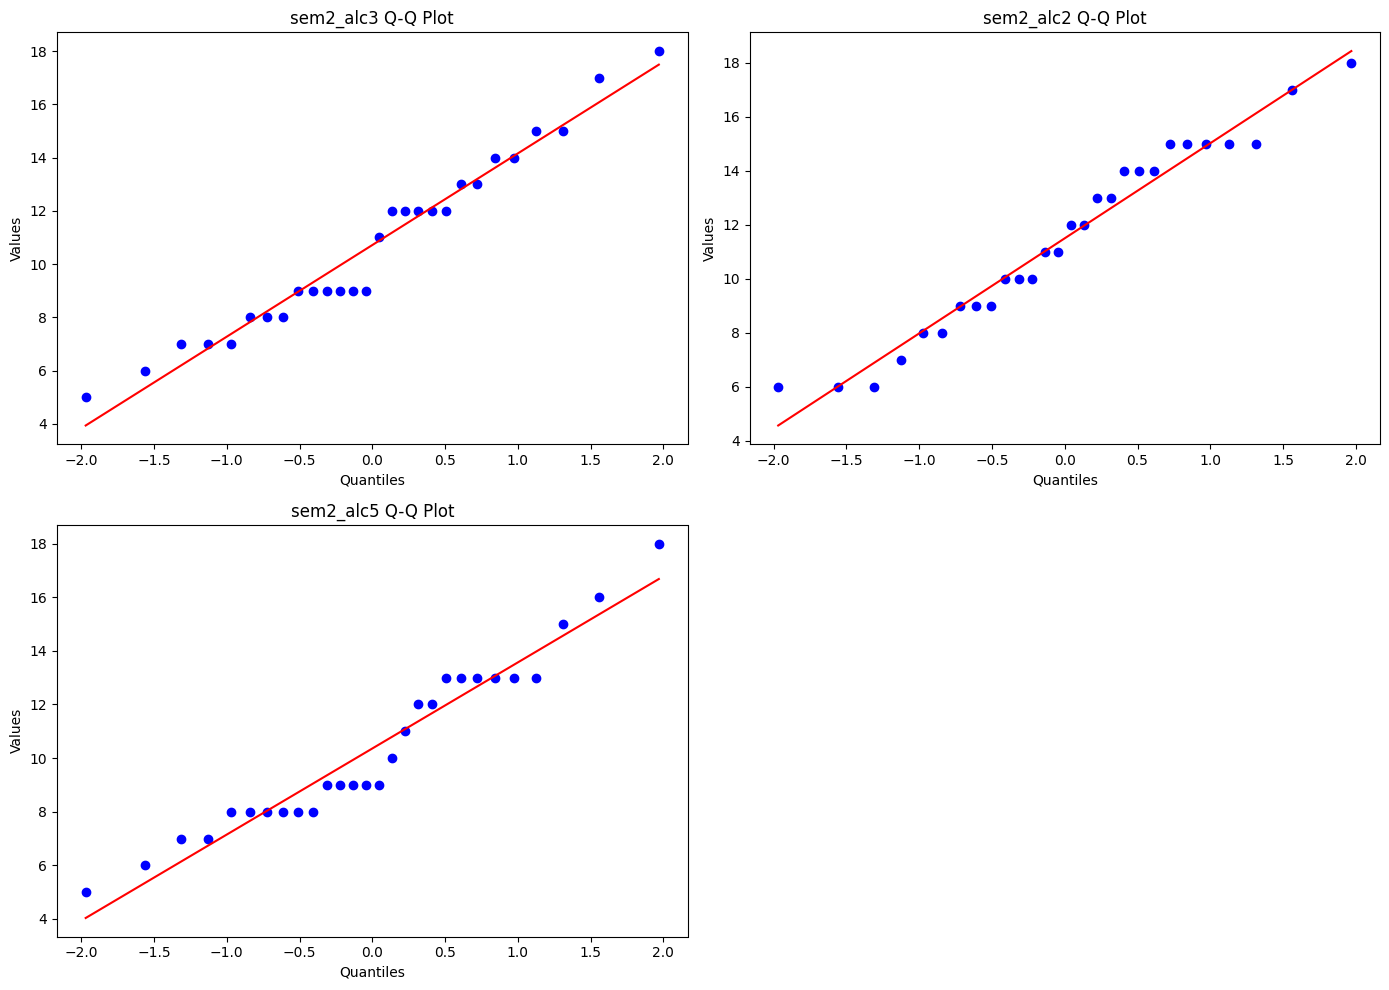

In [19]:
multi_group1.normality_visualization(vis_func = 'probplot')

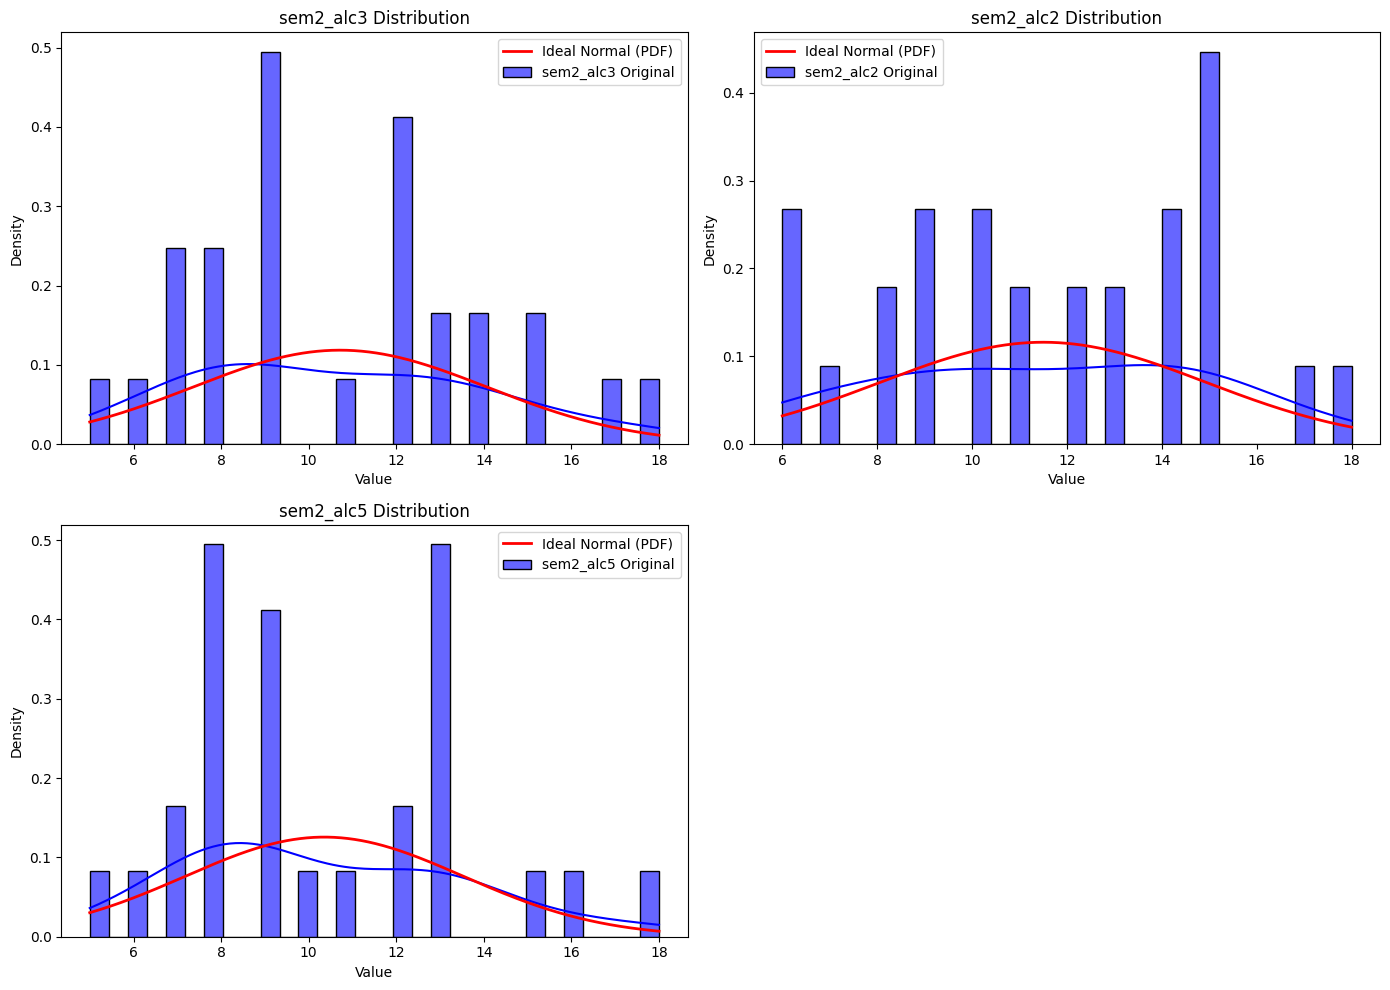

In [20]:
multi_group1.normality_visualization()

In [21]:
multi_group1.check_homoscedasticity()

---The Bartlett test has been performed---

H0: all input samples are from populations with equal variances

The test results: p-value = 0.9161972799630446, stat = 0.1750471327166922

Large p-value suggests that our data is homogeneous (the population standard deviations of the groups are all equal)



np.True_

---The Shapiro-Wilk normality test has been performed---

          sem2_alc3 sem2_alc2 sem2_alc5
stat       0.958085  0.954866  0.940237
p_value     0.31377  0.261891  0.112078
is_normal      True      True      True
All THE SAMPLES ARE NORMALLY DISTRIBUTED

---The one-way ANOVA test has been performed---

H0: Two or more groups have the same population mean



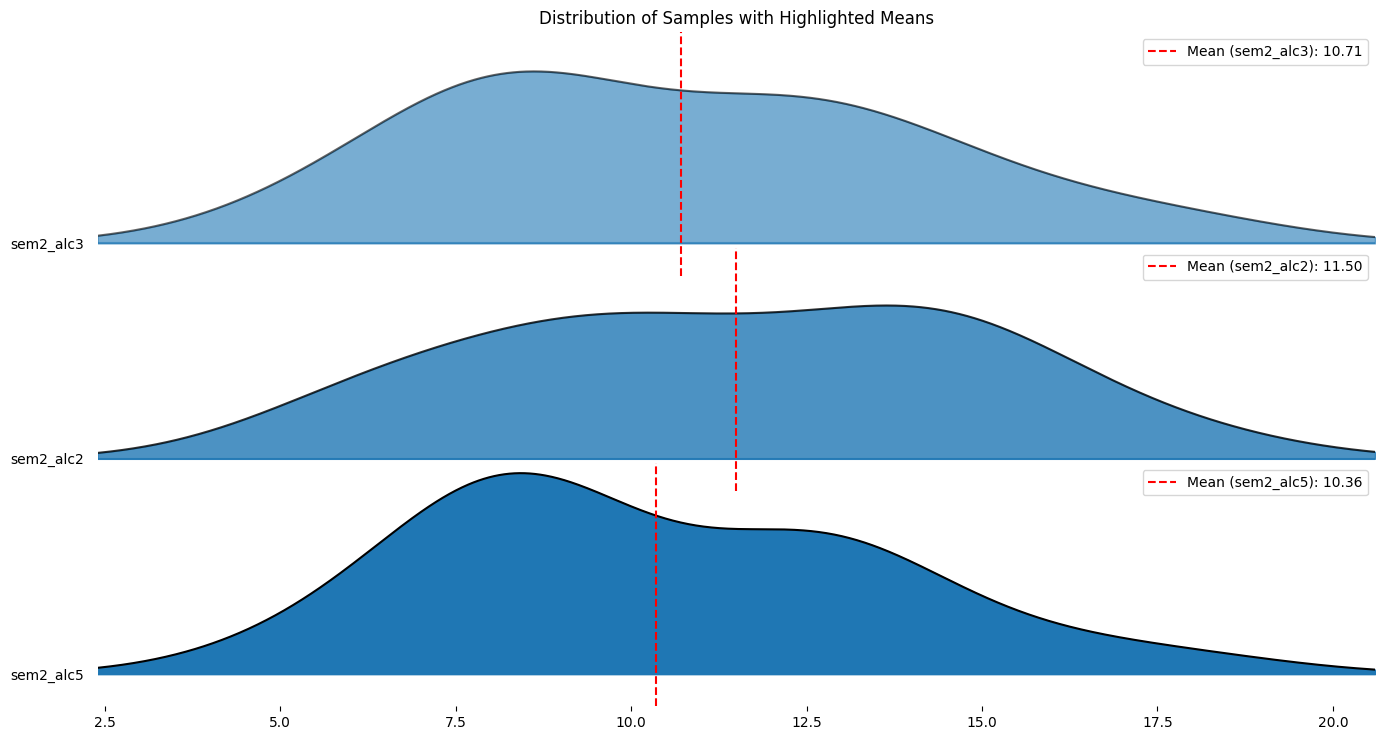

Test results: p-value = 0.4252, statistic = 0.8642

Conclusion: Failed to reject the null hypothesis, which means there is no statistically significant difference between the groups.



In [22]:
multi_group1.run_test()

In [23]:
multi_group_err1 = MultiGroupTest(df, ['sem3_alc12', 'sem3_alc5'])
multi_group_err1.run_test()

ValueError: The following columns are missing in the dataset: ['sem3_alc12']

### Kruskal-Wallis non-parametric H-test

---The Shapiro-Wilk normality test has been performed---

          sem3_alc2 sem3_alc5
stat       0.895501  0.937868
p_value     0.00899  0.097557
is_normal     False      True
Any of the samples is not normally distributed

---The Kruskal-Wallis H-test has been performed---

H0: The population medians of all the groups are equal



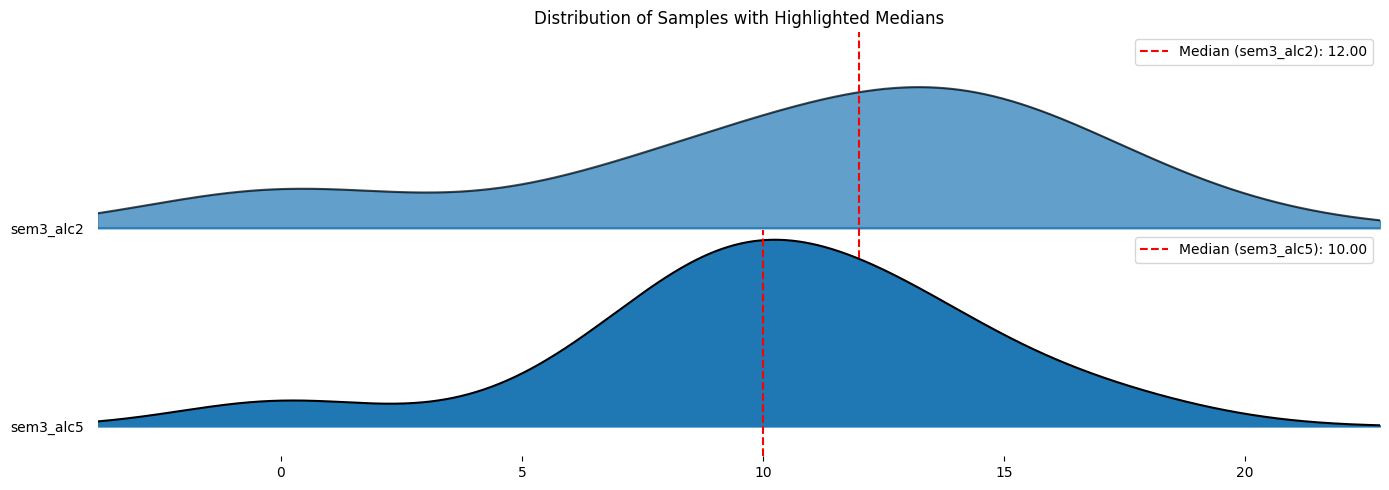

Test results: p-value = 0.2776, statistic = 1.1790

Conclusion: Failed to reject the null hypothesis, which means there is no statistically significant difference between the groups.



In [25]:
multi_group2 = MultiGroupTest(df, ['sem3_alc2', 'sem3_alc5'])
multi_group2.run_test()

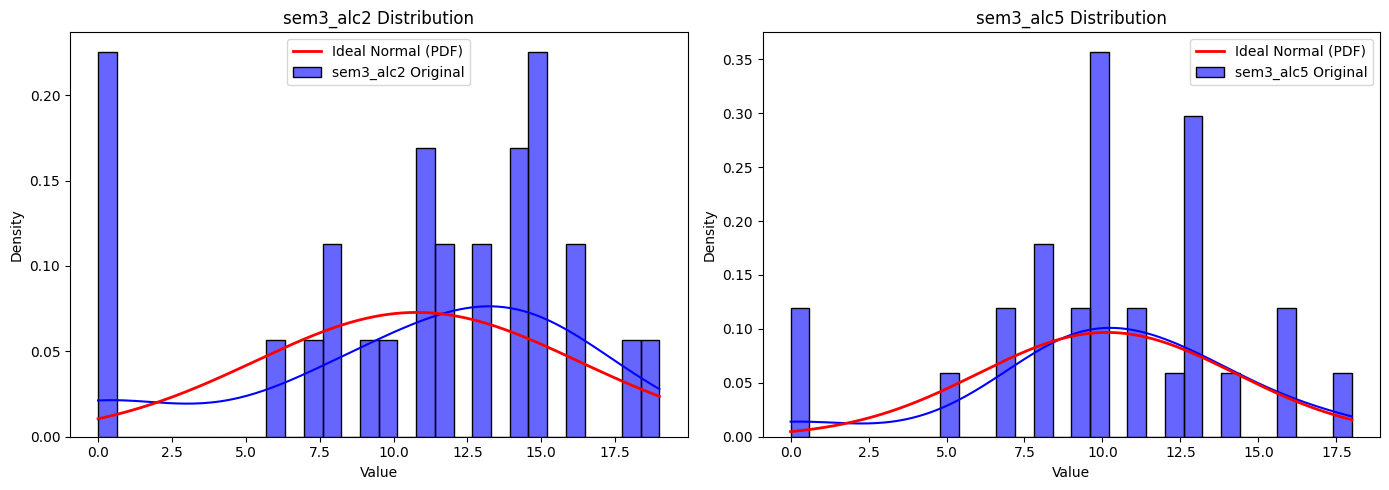

In [26]:
multi_group2.normality_visualization()

### Alexander Govern paremetric test

In [27]:
multi_group3 = MultiGroupTest(df, ['sem3_alc1', 'sem3_alc3', 'sem3_alc4'])

---The Shapiro-Wilk normality test has been performed---

          sem3_alc1 sem3_alc3 sem3_alc4
stat       0.936084  0.965861  0.973466
p_value    0.087891  0.475006  0.675861
is_normal      True      True      True
All THE SAMPLES ARE NORMALLY DISTRIBUTED

---The one-way ANOVA test has been performed---

H0: Two or more groups have the same population mean



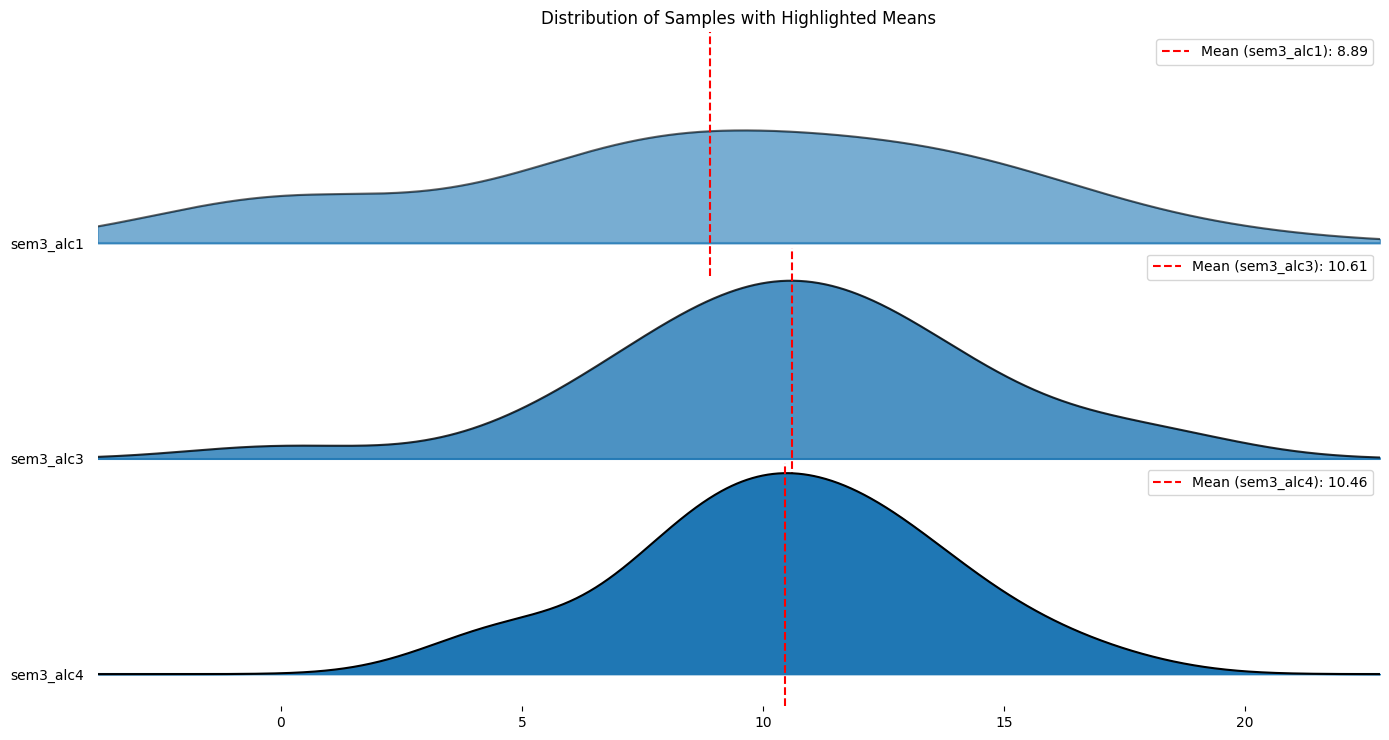

Test results: p-value = 0.2447, statistic = 1.4326

Conclusion: Failed to reject the null hypothesis, which means there is no statistically significant difference between the groups.



In [29]:
multi_group3.run_test()